<a href="https://colab.research.google.com/github/guhankesav/Ml/blob/main/CSE18511_heart_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CB.EN.U4CSE18511
POML P2 LAB

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import random 



df=pd.read_csv('/content/drive/MyDrive/6th SEM/POML/logistic_reg/heart.csv')


##1. To display count plot of “target” variable

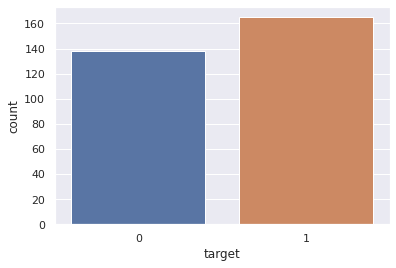

In [2]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="target", data=df)

##2.  To display count plot of “sex” variable

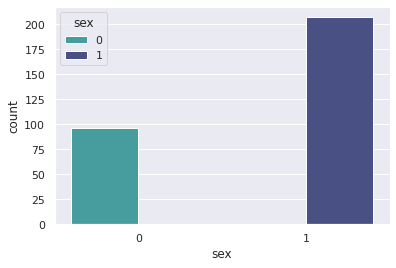

In [3]:
sns.countplot(x='sex', hue ="sex",data=df, palette="mako_r")
plt.show()

##3. Percentage of Patients having and not having heart disease

In [4]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


##4. Percentage of Male and Female Patients

In [5]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


##5. Frequency chart for the variable “age”

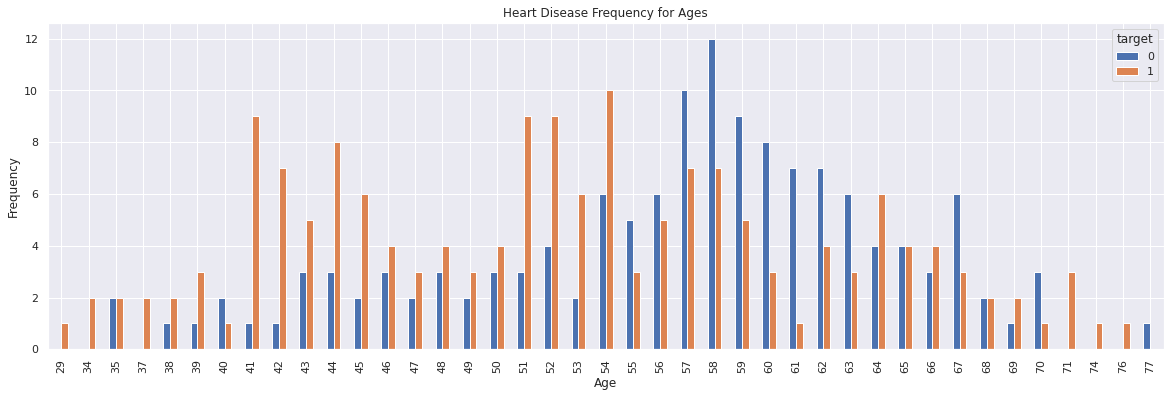

In [6]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##6. Use SKLearn library to create Model for Logistic Regression

In [7]:
data = df
x=data.iloc[:,:-1]
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

y=data.iloc[:,-1:]
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)



In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2)
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape )

(242, 13) (61, 13) (242, 1) (61, 1)


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
regr = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000)
regr.fit(x_train, y_train.values.ravel())
y_predict=regr.predict(x_test)


##7. Find loss of the initial model.

In [11]:
from sklearn.metrics import mean_squared_error,f1_score,classification_report
print("Mean Squared error",mean_squared_error(y_test,y_predict))
print(classification_report(y_test,y_predict))
print("F1 Score",f1_score(y_test, y_predict))

Mean Squared error 0.14754098360655737
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

F1 Score 0.8615384615384616


##8. Apply any of preprocessing technique and alternate solvers to reduce the loss value of the initial model

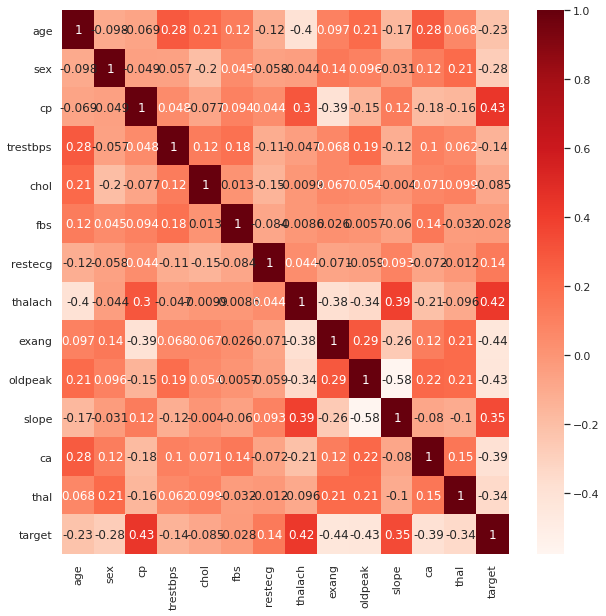

In [12]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

In [13]:
x2_df = x_df
l = x2_df.columns
for i in l:
    val = x2_df[i].corr(y_df['target'])
    print(i,val)
    if(abs(val) < 0.3):
        x2_df = x2_df.drop([i],axis=1)

age -0.22543871587483713
sex -0.2809365755017666
cp 0.43379826150689477
trestbps -0.1449311284977515
chol -0.08523910513756894
fbs -0.028045760272712827
restecg 0.13722950287377336
thalach 0.42174093381067435
exang -0.4367570833533018
oldpeak -0.4306960016873687
slope 0.34587707824172526
ca -0.3917239923512519
thal -0.34402926803830947


In [14]:
x2_df

,cp,thalach,exang,oldpeak,slope,ca,thal
0,1.000000,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.666667,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.333333,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.333333,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.000000,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...
298,0.000000,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,1.000000,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.000000,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.000000,0.335878,1.0,0.193548,0.5,0.25,1.000000


Separating dataset into x2_train and x2_test

In [15]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y_train,y_test = train_test_split(x2_df,y_df,test_size=0.2)
print (x2_train.shape,x2_test.shape,y_train.shape,y_test.shape )

(242, 7) (61, 7) (242, 1) (61, 1)


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x2_train,y_train)
acc = lr.score(x2_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.metrics import mean_squared_error,f1_score,classification_report
regr = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000)
regr.fit(x2_train, y_train.values.ravel())
y_predict=regr.predict(x2_test)
print("Mean Squared error",mean_squared_error(y_test,y_predict))
print(classification_report(y_test,y_predict))
print("F1 Score",f1_score(y_test, y_predict))

Mean Squared error 0.14754098360655737
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

F1 Score 0.8732394366197184


Error is signifiantly reduced by 0.1